<a href="https://colab.research.google.com/github/DavidSenseman/STA1403/blob/master/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **STA1403: "Biostats"**

### **Assignment 10: Cluster Analysis**

#### In this assignment you will learn about:

* K-Means Cluster Analysis
* Mapping integer values to replace string variables
* Using the `dataframe.copy()` method to make a copy of a dataframe.
* How to drop specific columns in a dataframe
* How to standardize the data 
* Converting a DataFrame into a NumPy Array
* The Elbow Method for selecting estimating the correct K value


### Google CoLab Instructions

The following code will map your GDrive to ```/content/drive``` and print out your Google GMAIL address.

In [1]:
# You must run this cell second
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


## **Introduction to Cluster Analysis**

**_Cluster analysis_** is a data analysis technique that explores the naturally occurring groups within a data set known as **_clusters_**. Cluster analysis doesn't need to group data points into any predefined groups, which means that it is an **_unsupervised_** learning method. Like regression analysis, cluster analysis is considered a form of **_Machine Learning_** that is one of the main componenets of **_Artifical Intelligence_** or **_AI_**.

![__](https://biologicslab.co/STA1403/images/A11/AI.png)

The two main forms of Cluster Analysis is **_K-Means Cluster Analysis_** and **_Hierachial Cluster Analysis_**. K-means clustering is the most commonly used unsupervised machine learning algorithm for partitioning a given data set into a set of **_K_** groups (i.e. k clusters), where **_K_** represents the number of groups pre-specified by the analyst. It classifies objects in multiple groups (i.e., _clusters_), such that objects within the same cluster are as similar as possible (i.e., high intra-class similarity), whereas objects from different clusters are as dissimilar as possible (i.e., low inter-class similarity). In k-means clustering, each cluster is represented by its center (i.e, centroid) which corresponds to the mean of points assigned to the cluster. 

There are two potential problems with the K-means clustering algorithm. First, it is a flat clustering method. After observations are assigned to their clusters, they are all considered to be similar within the same cluster. That is, the observations are not further separated based on dissimilarity within a cluster. Secondly, we need to specify the number of clusters K _a priori_. Finding the appropriate number of clusters is not trivial, and the selected number has a substantial impact on the results.

An alternative approach that avoids these issues is **hierarchical clustering**. The result of this method is a dendrogram (a tree). The root of the dendrogram is its highest level and contains all _n_ observations. The leaves of the tree are its lowest level and are each a unique observation.

In this lesson, the cluster analysis approach is introducted by using K-Means Cluster analyis to classify three species of the iris flowers based on their petal and sepal lengths. In a future lesson we look at an example of hiearchical cluster analysis.

In [2]:
# Read in the data 

import pandas as pd

# Read data file
irisDF = pd.read_csv("https://biologicslab.co/STA1403/data/iris.csv", 
                   sep=',')  # define the separator as a comma

# Print out the first 6 values.
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
irisDF.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Map Species

irisDF_mapped = irisDF.copy()
mapping =  {'Iris-setosa': 0,
            'Iris-versicolor': 1,
            'Iris-virginica': 2}

irisDF_mapped['species'] = irisDF_mapped['species'].map(mapping)

irisY=irisDF_mapped['species'].values
irisY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [5]:


X_columns = irisDF.columns.drop('species')

# Generate x-values as numpy array
irisX = irisDF[X_columns].values
irisX[:,1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

### **Example 1: _K-Means Cluster Analysis_ of the Iris dataset**

In this example we will use K-Means Cluster Analysis to separate three species of iris:  _Iris setosa_, _Iris virginica_ and _Iris versicolor_ using the famous **_Iris Data Set_**. 

The Iris flower data set or **_Fisher's Iris data set_** is a multivariate data set that was used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper(1). The data set consists of 50 samples from each of three species of Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). The image below shows the flower of each of these species.

![__](https://biologicslab.co/STA1403/images/A11/irisSpecies.png)


Four features were measured from each iris plant: the length and the width of the sepals and petals, in centimeters. 

![__](https://biologicslab.co/STA1403/images/A11/SepalPetal.png)

In statistics, a **_cluster_** refers to a collection of data points aggregated together because of certain similarities. In this example, flowers of the same species form a cluster since each species has relatively unique combination of petal and sepal lengths and widths. The K-Means Cluster analysis is based on algorithm's movement of **_K centroids_** around the parameter space until each centroid is a close to the center of a cluster as possible. 

### **The Centroid**

A **_centroid_** is the imaginary or real location representing the center of the cluster. If there are 3 clusters, as in this example, there will be 3 centroids, one for each cluster. In mathematics and physics, the _centroid_ (also known as geometric center of a figure), the arithmetic mean position of all the points in the surface of the figure. The ‘means’ in the K-means refers to averaging of the data, that is, finding the centroid.

### **How the K-means algorithm works**

As mentioned about, K-Means Cluster analysis is a form of **_Machine Learning_**. Your computer performs a series of "loops" (_iterations_) in which it is **_learning about the data_**. The K-means algorithm starts with a first group of randomly selected **_K_** centroids--their initial location within the parameter space is randomized--which are used as the beginning points for every cluster. Your computer then performs iterative (repetitive) calculations to optimize the positions of the centroids as close to the center of its respective cluster as possible. To make these calculation manually would take a considerable amount of time and effort on your part. However, these calculations are **_exactly_** this kind of small repetitive task that computers are supremely good at and can perform at blazing speeds. 

In this example, we will be asking your computer to make up to 300 iterations. In other words, your computer will repeat the K-means computational procedure over and over, and each time, it will apply to the result of the last run to improve the results obtained the next run. On every run, your computer will (hopefully) get closer (better) approximations to the solution of our problem -- separating all 150 iris plants in our sample into 3 clusters, one for each species. 

The software is smart enough to know when the centroids have stabilized and there is no change in their values because the clustering has been successful. At this point the "looping" will stop and the results will be printed out. However, some data is not separable into clusters in which case the program terminates when the number of maximum iterations has been reached. 

# **Estimating _K_ using the _Elbow Method_**

One of the challenges using K-Means analysis is deciding on the number of clusters to look for. In this example we already know that we should be looking for 3 clusters, one for each plant species. But in most cases we won't know how many clusters to look for. Fortunatley, for picking what number to use for **_K_**, there is a widely accepted technique cslled the **_Elbow Method_** that gives an estimate for **_K_**. 

In the Elbow Method, we are actually varying the number of clusters (K) from 1 – 10. For each value of *_K_*, we are calculating **_WCSS_** (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph, we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph moves almost parallel to the X-axis. The K value corresponding to this point is the optimal value of K or an optimal number of clusters.

The Python code in the cell below generates a line plot of the WCSS for **_K_** values from 1 to 10.

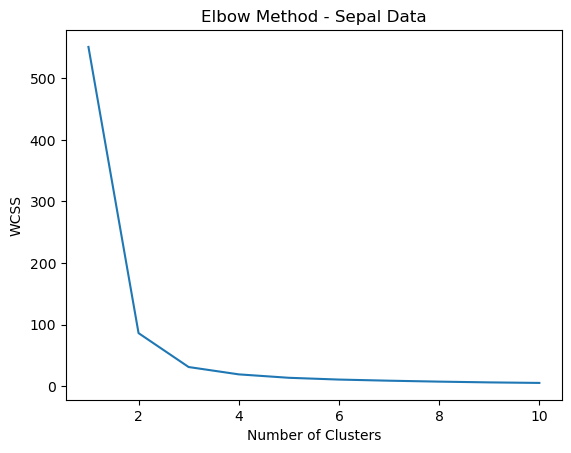

In [6]:
# Example 

## Compute and then plot the WCSS for the K values between 1 and 10 
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Use only petal data
petalX=irisX[:, 2:4]

# Create the WCSS Plot against no. of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(petalX)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method - Sepal Data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

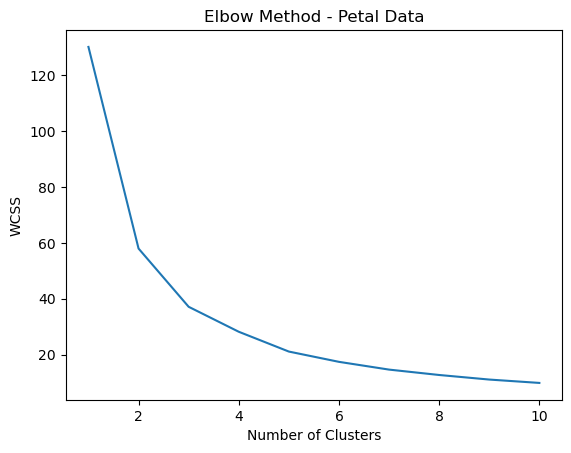

In [7]:
# Insert your code for Exercise   here

## Compute and then plot the WCSS for the K values between 1 and 10 
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Only use petal data
petalX=irisX[:, :2]

# Create the WCSS Plot against no. of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(petalX)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method - Petal Data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

When we analyze the graph, we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph moves almost parallel to the X-axis. The K value corresponding to this point is the optimal value of K or an optimal number of clusters. 

![__](Elbow.png)

As expected the Elbow Point for the iris data is K = 3.


## **Perform K-Means Cluster analysis of the Iris data**

The Python package called **_scikit-learn_** provides a number of powerful machine learning functions for Python. In the next code cell we use the scikit-learn function, `KMeans()` to perform the analsys. 

This function was imported at the beginning of this lesson. 

`from sklearn.cluster import KMeans`

`KMeans()` takes several arguments. The first arugment, `n_clusters` is the number of clusters that we want the algorithm to look for. In this case `n_clusters=3` since that was the result of the Elbow Method. We have also set the maximum iterations, `max_iter`, to be 300 which is a reasonable value. 

After `KMeans()` has run, we use the graphics program, **_Matlibplot_** (alias `plt`) to generate a graphical outout the results as an X-Y scatterplot.

In [8]:
# Insert your code here for Exercise 1

from statistics import mean

# Create boolean masks

SetosaMask = irisDF.species == 'Iris-setosa'
VersicolorMask = irisDF.species == 'Iris-versicolor'
VirginicaMask = irisDF.species == 'Iris-virginica'

# Compute data for Iris setosa
avgSetosaSepalLen = mean(irisDF.sepal_length[SetosaMask])
avgSetosaSepalWid = mean(irisDF.sepal_width[SetosaMask])
sepalSetosaRatio=avgSetosaSepalLen/avgSetosaSepalWid
print("mean Setosa sepal length =", avgSetosaSepalLen, 
      ": mean sepal width =", avgSetosaSepalWid, "mm",
      ": sepal length/width =", sepalSetosaRatio)  

# Compute data for Iris versicolor
avgVersicolorSepalLen = mean(irisDF.sepal_length[VersicolorMask])
avgVersicolorSepalWid = mean(irisDF.sepal_width[VersicolorMask])
sepalVersicolorRatio=avgVersicolorSepalLen/avgVersicolorSepalWid
print("mean Versicolor sepal length =", avgVersicolorSepalLen, 
      ": mean Sepal width =", avgVersicolorSepalWid, "mm",
      ": sepal length/width =", sepalVersicolorRatio)

# Compute data for Iris virginia
avgVirginicaSepalLen = mean(irisDF.sepal_length[VirginicaMask])
avgVirginicaSepalWid = mean(irisDF.sepal_width[VirginicaMask])
sepalVirginicaRatio=avgVirginicaSepalLen/avgVirginicaSepalWid
print("mean Virginica sepal length =", avgVirginicaSepalLen, 
      ": mean sepal width =", avgVirginicaSepalWid, "mm"
      ": sepal length/width =", sepalVirginicaRatio)


mean Setosa sepal length = 5.006 : mean sepal width = 3.418 mm : sepal length/width = 1.4645991808074899
mean Versicolor sepal length = 5.936 : mean Sepal width = 2.77 mm : sepal length/width = 2.142960288808664
mean Virginica sepal length = 6.588 : mean sepal width = 2.974 mm: sepal length/width = 2.215198386012105


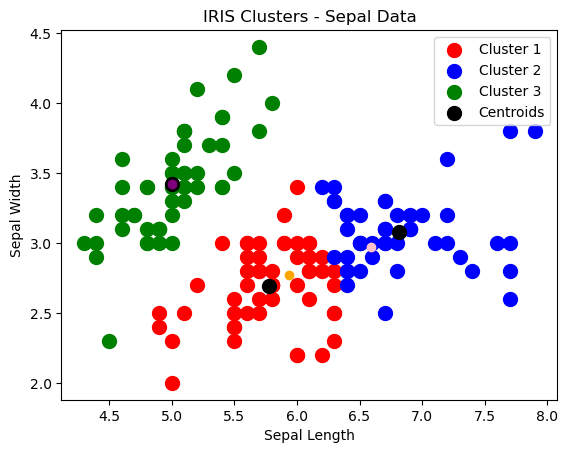

In [51]:
# Example 

X = irisX[:, :2]

# Train K-Means Clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
 
# Create the visualization plot of the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.scatter(avgSetosaSepalLen,avgSetosaSepalWid, c='purple')
plt.scatter(avgVersicolorSepalLen,avgVersicolorSepalWid, c='orange')
plt.scatter(avgVirginicaSepalLen,avgVirginicaSepalWid, c='pink')
plt.title('IRIS Clusters - Sepal Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

This scatterplot shows colored 150 data points--one for each iris plant in the sample--as an X-Y pair. The X-value of a pair is the **_Sepal Length_** of a particular plant, while the Y-value is the **_Sepal Width_** of the same plant. As you can see by inspection, the K-Means analysis has divided the 150 plants into three different groups (clusters) indicated by their color (blue, red and green). **NOTE:** In the event that you happen to be red-green colorblind, feel free to change the colors in the Python code above to better visualize the data. The X-Y plot also shows the final location of each of the 3 centroids (the center of each cluster) as a black dot.  

While KMeans was able to cleanly separate Cluster 1 from Clusters 2 and 3, the technique was less sucessful is separating the second and third cluster from each other. There is no guarantee that any data set can be cleanly separated from one another. 

### Example X : Which species is in which cluster?

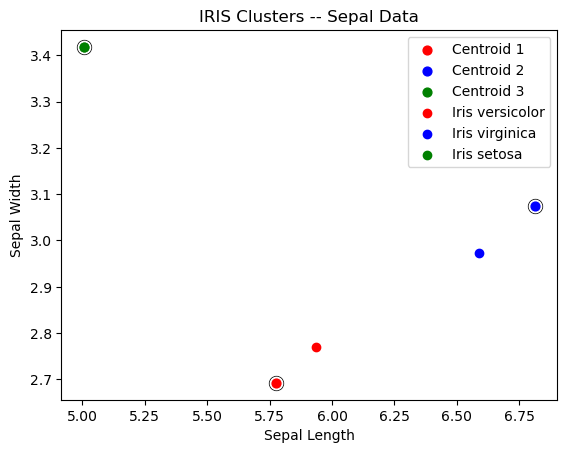

In [53]:
# Example X: Which species is in which cluster? 

# Assign X to sepal lengths and widths
X = irisX[:, :2]

# Train K-Means Clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
 
# Create the visualization plot of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 80, c = 'white')
plt.scatter(kmeans.cluster_centers_[0,0], kmeans.cluster_centers_[0,1], s = 40, c = 'red', label = 'Centroid 1')
plt.scatter(kmeans.cluster_centers_[1,0], kmeans.cluster_centers_[1,1], s = 40, c = 'blue', label = 'Centroid 2')
plt.scatter(kmeans.cluster_centers_[2,0], kmeans.cluster_centers_[2,1], s = 40, c = 'green', label = 'Centroid 3')
plt.scatter(avgVersicolorSepalLen,avgVersicolorSepalWid, c='red', label='Iris versicolor')
plt.scatter(avgVirginicaSepalLen,avgVirginicaSepalWid, c='blue', label='Iris virginica')
plt.scatter(avgSetosaSepalLen,avgSetosaSepalWid, c='green', label='Iris setosa')

plt.title('IRIS Clusters -- Sepal Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

Based on the above scatterplot, we can see that _K_= Means analysis of sepal length and width, Cluster 1 is _Iris versicolor_, Cluster 2 is _Iris virginica_ and Cluster 3 is _Iris setosa_.

### **Example 7B: Find the number of flowers in each cluster**

Our K-Means Cluster algorithmn seems to have worker perfectly! The 150 datapoints have been assigned to one of three clusters. Let's just check to see if the algorithmn would as perfectly as it appears. We can do this by seeing how many individual plants are in each cluster. The variable `y-kmeans` is a boolean mask. The term `y_kmeans1[:] == 0` is a mask for all the flowera put into Cluster 1, `y_kmeans[:] == 1'` is a mask for all the flowers put into Cluster 2 and `y_kmeans[:] == 2'` is a mask for all the flowers put into Cluster 3. 

Since the boolean value `True` evaluates to the number `1`, and the boolean value `False` evaluates to the number `0`, a simply way to computer the number of flowers, for example in Cluster 1, would be to simply find the sum of `y_kmeans1[:] == 0`. 

In [54]:
# Example 6B: Find the number of flowers in each cluster

# Calculate the number of flowers in each cluster
numIrisCluster1 = sum(y_kmeans[:] == 0)
numIrisCluster2 = sum(y_kmeans[:] == 1)
numIrisCluster3 = sum(y_kmeans[:] == 2) 
                      
# Print out the number of flowers in each cluster
print("Total number of flowers in Cluster 1 =", numIrisCluster1)
print("Total number of flowers in Cluster 2 =", numIrisCluster2)
print("Total number of flowers in Cluster 3 =", numIrisCluster3)

# Calculate the number of flowers in each species
numIrisSetosa = sum(irisDF.species == "Iris-setosa")                      
numIrisVersicolor = sum(irisDF.species == "Iris-versicolor")                      
numIrisVirginica = sum(irisDF.species == "Iris-virginica")
                        
# Print out the number of flowers in each species
print("Total number of of Iris setosa flowers =", numIrisSetosa)
print("Total number of Iris versacolor flowers =", numIrisVersicolor )
print("Total number of Iris virginica flowers =", numIrisVirginica )

# Calculate the total number of flowers in the dataset
totalIrisFlowers = len(irisDF)

# Print out the total number of flowers in the dataset    
print("Total number of flowers in the Iris flower data = ", totalIrisFlowers)

Total number of flowers in Cluster 1 = 53
Total number of flowers in Cluster 2 = 47
Total number of flowers in Cluster 3 = 50
Total number of of Iris setosa flowers = 50
Total number of Iris versacolor flowers = 50
Total number of Iris virginica flowers = 50
Total number of flowers in the Iris flower data =  150


## **Oops! Something is not quite right!**

The number of flowers in each cluster doesn't exactly match the number of flowers in each species. The actual _Iris_ flower dataset had a total of `150` flowers, with `50` flowers from each species. Our K-Means Cluster analysis did identify `50` flowers belonging to Cluster 3, but it put `53` flowers in Cluster 1 and only `47` flowers in Cluster 2. 

We'll need to further investigate this discrepancy. 

In [11]:
# Insert your code here for Exercise 1

from statistics import mean

# Create boolean masks

SetosaMask = irisDF.species == 'Iris-setosa'
VersicolorMask = irisDF.species == 'Iris-versicolor'
VirginicaMask = irisDF.species == 'Iris-virginica'

# Compute data for Iris setosa
avgSetosaPetalLen = mean(irisDF.petal_length[SetosaMask])
avgSetosaPetalWid = mean(irisDF.petal_width[SetosaMask])
petalSetosaRatio=avgSetosaPetalLen/avgSetosaPetalWid
print("mean Setosa petal length =", avgSetosaPetalLen, 
      ": mean petal width =", avgSetosaPetalWid, "mm",
      ": petal length/width =", petalSetosaRatio)  

# Compute data for Iris versicolor
avgVersicolorPetalLen = mean(irisDF.petal_length[VersicolorMask])
avgVersicolorPetalWid = mean(irisDF.petal_width[VersicolorMask])
petalVersicolorRatio=avgVersicolorPetalLen/avgVersicolorPetalWid
print("mean Versicolor petal length =", avgVersicolorPetalLen, 
      ": mean petal width =", avgVersicolorPetalWid, "mm",
      ": petal length/width =", petalVersicolorRatio)

# Compute data for Iris virginia
avgVirginicaPetalLen = mean(irisDF.petal_length[VirginicaMask])
avgVirginicaPetalWid = mean(irisDF.petal_width[VirginicaMask])
petalVirginicaRatio=avgVirginicaPetalLen/avgVirginicaPetalWid
print("mean Virginica petal length =", avgVirginicaPetalLen, 
      ": mean petal width =", avgVirginicaPetalWid, "mm"
      ": petal length/width =", petalVirginicaRatio)


mean Setosa petal length = 1.464 : mean petal width = 0.244 mm : petal length/width = 6.0
mean Versicolor petal length = 4.26 : mean petal width = 1.326 mm : petal length/width = 3.2126696832579182
mean Virginica petal length = 5.552 : mean petal width = 2.026 mm: petal length/width = 2.7403751233958538


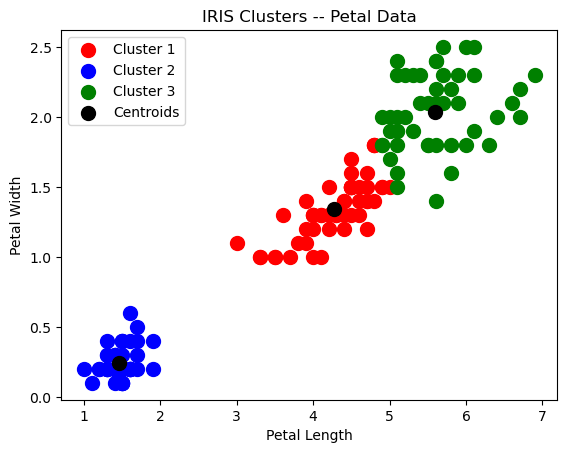

In [12]:
# Insert your code for Exercise   here 

X = irisX[:, 2:4]

# Train K-Means Clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
 
# Create the visualization plot of the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('IRIS Clusters -- Petal Data')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

This scatterplot shows colored 150 data points--one for each iris plant in the sample--as an X-Y pair. The X-value of a pair is the **_Petal Length_** of a particular plant, while the Y-value is the **_Petal Width_** of the same plant. 

As you can see by inspection, the K-Means analysis has divided the 150 plants into three different groups (clusters) indicated by their color (blue, red and green). **NOTE:** In the event that you happen to be red-green colorblind, feel free to change the colors in the Python code above to better visualize the data. The X-Y plot also shows the final location of each of the 3 centroids (the center of each cluster) as a black dot.  

While KMeans was able to cleanly separate Cluster 2 from Clusters 1 and 3, the technique was less sucessful is separating the second and third cluster from each other. There is no guarantee that any data set can be cleanly separated from one another. 

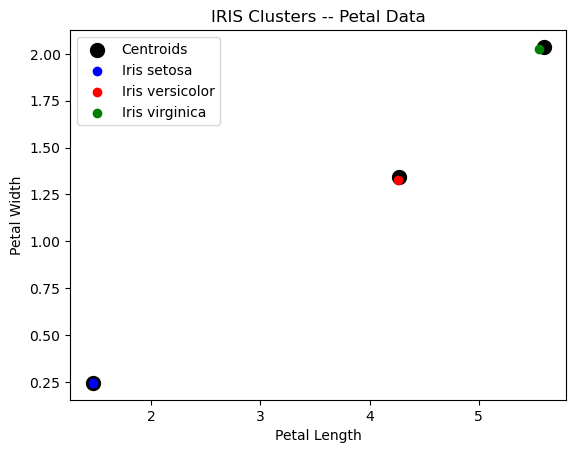

In [13]:
# Insert your code for Exercise   here 

X = irisX[:, 2:4]

# Train K-Means Clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
 
# Create the visualization plot of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.scatter(avgSetosaPetalLen,avgSetosaPetalWid, c='blue', label='Iris setosa')
plt.scatter(avgVersicolorPetalLen,avgVersicolorPetalWid, c='red', label='Iris versicolor')
plt.scatter(avgVirginicaPetalLen,avgVirginicaPetalWid, c='green', label='Iris virginica')
plt.title('IRIS Clusters -- Petal Data')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

Based on the above scatterplot, we can see that _K_Means analysis of petal length and width, Cluster 2 is _Iris setosa_, Cluster 1 is _Iris versicolor_ and Cluster 3 is _Iris virginica_.

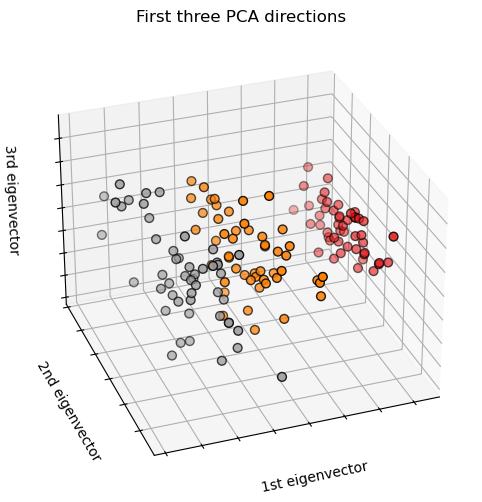

In [14]:
# Perform PCA on the iris data set

from sklearn.decomposition import PCA

# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# Assign X and Y to iris data
X = irisX
y = irisY

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

As you can see, the dataframe `iris_df` contains the measurements for Sepal Length, Sepal Width, Petal Length, Petal Width and the **Species** name for each of the 150 iris plants in the data set. 

The `iris_df` dataframe contains all of the information that you need to figure out which iris species corresponds to which cluster. You will have to some thinking on your own to figure this problem. You will also have to write some Python code to extract the information you need to decide with species goes with which cluster. (HINT: You will probably need to create some _boolean masks_).

In the cell below, write all of the Python code you need to solve this task. Make sure to use a **lot** of comments so I can follow what your code is trying to accomplish. Again your grade on this lesson is largely dependent on what you write in the code cell below. If you leave this cell blank, you won't receive any credit! 

In the cell below tell my which species is represented by Cluster 1, Cluster 2 and Cluster 3. And more importantly, **Why do you think your assignment is correct?** You will **not** receive any credit for simply assigning the correct species to each cluster. What I am looking for is your ability to use the Python tools you can be given to extract meaningful information from `iris_df` that can be use in assigning the different species to the different clusters. It is also important that I can see the Python code that you wrote to extract this information.

## **Hierarchical Clustering**

There are two potential problems with the _K_-means clustering algorithm. First, it is a flat clustering method. After observations are assigned to their clusters, they are all considered to be similar within the same cluster. That is, the observations are not further separated based on dissimilarity within a cluster. Secondly, we need to specify the number of clusters _K_ _a priori_. Finding the appropriate number of clusters is not trivial, and the selected number has a substantial impact on the results.

An alternative approach that avoids these issues is **hierarchical clustering**. The result of this method is a dendrogram (a tree). The root of the dendrogram is its highest level and contains all _n_ observations. The leaves of the tree are its lowest level and are each a unique observation.

There are two general algorithms for hierarchical clustering :

1 **Agglomerative (bottom-up)**:We start at the bottom of the tree, where every observation is a cluster (i.e., there are n clusters). Then we merge two of the clusters with the smallest degree of dissimilarity (i.e., the two most similar clusters). Now we have n − 1 clusters. We continue merging clusters until we have only one cluster (the root) that includes all observations.

2 **Divisive (top-down)**: We start at the top of the tree, where all observations are grouped in a single cluster. Then we divide the cluster into two new clusters that are most dissimilar. Now we have two clusters. We continue splitting existing clusters until every observation is its own cluster

Of the above two strategies, agglomerative algorithm is more common. Both algorithms, however, require a measure of dissimilarity between two clusters. In other words, we need to specify a distance measure for two clusters analogous to the distance measure we defined for two observations. For every pair of observations, where one is from cluster i, and the other one is from cluster _j_ , we can find the squared Euclidean distances _dij_ . Then we can use one of the following methods to calculate the overall distance between two clusters:

* _Single linkage_ clustering uses the minimum dij among all possible pairs as the distance between the two clusters. This is the distance between two observations, one from each cluster, that are closest to each other.

* _Complete linkage_ clustering uses the maximum dij as the distance between the two clusters. This is the distance between two observations, one from each cluster, that are furthest apart.

* _Average linkage_ clustering uses the average dij over all possible pairs as the distance between the two clusters.

* _Centroid linkage_ clustering finds the centroids of the two clusters and uses the distance between the centroids as the distance between the two clusters.

### Data Set for the Lesson

The data for this lesson is in a file called `Protein.txt`. 

#### Description: 

This data set measures protein consumption in twenty-five European countries for nine food groups. 

**Variable Names:**

* `Country`: Country name 
* `RdMeat`: Red meat 
* `WhMeat`: White meat 
* `Eggs:` Eggs 
* `Milk`: Milk 
* `Fish`: Fish 
* `Cereal`: Cereals 
* `Starch`: Starchy foods 
* `Nuts`: Pulses, nuts, and oil-seeds 
* `Fr&Veg`: Fruits and vegetables

**Original Reference**

Weber, A. (1973) _Agrarpolitik im Spannungsfeld der internationalen Ernaehrungspolitik_, Institut fuer Agrarpolitik und marktlehre, Kiel. Data also found in: Gabriel, K.R. (1981) Biplot display of multivariate matrices for inspection of data and diagnosis. In _Interpreting Multivariate Data_ (Ed. V. Barnett), New York: John Wiley & Sons, 147-173. Hand, D.J., et al. (1994) _A Handbook of Small Data Sets_, London: Chapman & Hall, 297-298.



### Lession Setup

Import the necessary packages

### Data Set for the Lesson

The data for this lesson is in a file called `Protein.txt`. 

#### Description: 

This data set measures protein consumption in twenty-five European countries for nine food groups. 

**Variable Names:**

* `Country`: Country name 
* `RdMeat`: Red meat 
* `WhMeat`: White meat 
* `Eggs:` Eggs 
* `Milk`: Milk 
* `Fish`: Fish 
* `Cereal`: Cereals 
* `Starch`: Starchy foods 
* `Nuts`: Pulses, nuts, and oil-seeds 
* `Fr&Veg`: Fruits and vegetables

**Original Reference**

Weber, A. (1973) _Agrarpolitik im Spannungsfeld der internationalen Ernaehrungspolitik_, Institut fuer Agrarpolitik und marktlehre, Kiel. Data also found in: Gabriel, K.R. (1981) Biplot display of multivariate matrices for inspection of data and diagnosis. In _Interpreting Multivariate Data_ (Ed. V. Barnett), New York: John Wiley & Sons, 147-173. Hand, D.J., et al. (1994) _A Handbook of Small Data Sets_, London: Chapman & Hall, 297-298.



### Read In the Data File

The cell below uses `pd.read_csv()` to read the data file called `Protein.txt` and create a DataFrame called 'protein_df'. 
The Python command `protein.head()` allows us to look at the first 5 records.   

In [37]:
# Read in the data 

import pandas as pd

# Read data file
proDF = pd.read_csv("https://biologicslab.co/STA1403/data/Protein.txt", 
                   sep=' ')  # define the separator as a space

# Print out the first 6 values.
proDF.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


### Lession Setup

Import the necessary packages

### Example 1: Hierachiacal CLuster Analysis

Example 1 follows the example in your textbook on page 294. Here we are using Python instead of R-Commander.  

The first step is to use the `drop` method to create a variable called `X` that contains all of the food information but not the names of the countries. 

In [39]:
denLables=list(proDF['Country'].unique())
print(denLables)

['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Czechoslovakia', 'Denmark', 'E.Germany', 'Finland', 'France', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Spain', 'Sweden', 'Switzerland', 'UK', 'USSR', 'W.Germany', 'Yugoslavia']


In [38]:
denLables=list(proDF['Country'].unique())
#Iris_feature_list=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
#denLabels=proDF.columns.drop('Country').tolist()

print(denLabels)

['RedMeat', 'WhiteMeat', 'Eggs', 'Milk', 'Fish', 'Cereals', 'Starch', 'Nuts', 'Fr.Veg']


In [34]:

X_columns = proDF.columns.drop('Country')

# Generate x-values as numpy array
proX = proDF[X_columns].values
# proX

The next step is to extract the country names so that we can use them to label our dendogram. We will use the function `np.array()` to create an array of names (_strings_) instead of leaving them in a dataframe. 

In [35]:
# Extract the country names for labels
denlabs = np.array(protein_df.iloc[:,0])
denlabs

array(['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Czechoslovakia',
       'Denmark', 'E.Germany', 'Finland', 'France', 'Greece', 'Hungary',
       'Ireland', 'Italy', 'Netherlands', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Spain', 'Sweden', 'Switzerland', 'UK', 'USSR',
       'W.Germany', 'Yugoslavia'], dtype=object)

Now we are ready to generate the dendogram. For this we will be using the `dendogram()` function that comes with the `scipy` package. The argument `color_theshold = x` can be changed to "cut" the dendogram at different levels. In this example, the `color_threshold` is set to `22`.

In [41]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
%matplotlib inline

X = proX
Z = sch.linkage(X, method = 'median')
dendrogram(Z, labels=denLabels, leaf_rotation=0, orientation="left", color_threshold=14, above_threshold_color='grey')
plt.title('Dendrogram for European Food Consumption')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance');
plt.show()

ValueError: Dimensions of Z and labels must be consistent.

With the color_threshold set to 14, we can see three clusters. The blue cluster contains the northern, western European countries (e.g Switzerland, W. Germany), the red cluster contains the two countries on the Iberian peninsula (Spain and Portugal), the green cluster (e.g. Poland, Italy, USSR), southern and eastern European countries. Finland is not part of any cluster. 

This is a relatively old data set (early 1970's) so a lot changed since the fall of the USSR. 

## Execise 1

Change the value of the color_threshold to generate only two clusters.

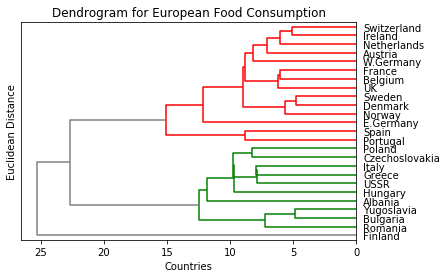

In [37]:
# X = protein_df
Z = sch.linkage(X, method = 'median')
dendrogram(Z, labels=denlabs, leaf_rotation=0, orientation="left", color_threshold=17, above_threshold_color='grey')
plt.title('Dendrogram for European Food Consumption')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance');
plt.show()

## Execise 2

Change the value of the color_threshold to generate only five clusters.

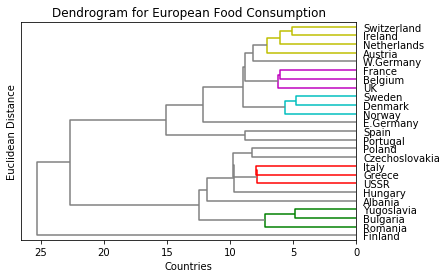

In [38]:
# X = protein_df
Z = sch.linkage(X, method = 'median')
dendrogram(Z, labels=denlabs, leaf_rotation=0, orientation="left", color_threshold=8, above_threshold_color='grey')
plt.title('Dendrogram for European Food Consumption')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance');
plt.show()

In [24]:
proDF = pd.read_csv(https://biologicslab.co/STA1403/data/'Protein.txt', header=0, sep=' ')
proDF.head()

SyntaxError: invalid syntax (2757473101.py, line 1)

### Example 1: Hierachiacal CLuster Analysis

Example 1 follows the example in your textbook on page 294. Here we are using Python instead of R-Commander.  

The first step is to use the `drop` method to create a variable called `X` that contains all of the food information but not the names of the countries. 

In [34]:
# Extract everything but the country name
X = protein_df.drop("Country", axis =1)
X.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


The next step is to extract the country names so that we can use them to label our dendogram. We will use the function `np.array()` to create an array of names (_strings_) instead of leaving them in a dataframe. 

In [35]:
# Extract the country names for labels
denlabs = np.array(protein_df.iloc[:,0])
denlabs

array(['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Czechoslovakia',
       'Denmark', 'E.Germany', 'Finland', 'France', 'Greece', 'Hungary',
       'Ireland', 'Italy', 'Netherlands', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Spain', 'Sweden', 'Switzerland', 'UK', 'USSR',
       'W.Germany', 'Yugoslavia'], dtype=object)

Now we are ready to generate the dendogram. For this we will be using the `dendogram()` function that comes with the `scipy` package. The argument `color_theshold = x` can be changed to "cut" the dendogram at different levels. In this example, the `color_threshold` is set to `22`.

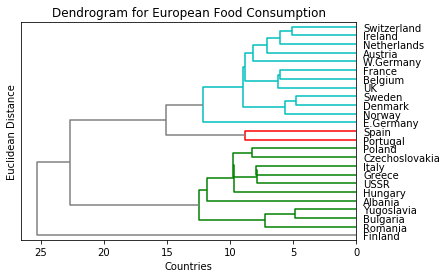

In [36]:
# X = protein_df
Z = sch.linkage(X, method = 'median')
dendrogram(Z, labels=denlabs, leaf_rotation=0, orientation="left", color_threshold=14, above_threshold_color='grey')
plt.title('Dendrogram for European Food Consumption')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance');
plt.show()

With the color_threshold set to 14, we can see three clusters. The blue cluster contains the northern, western European countries (e.g Switzerland, W. Germany), the red cluster contains the two countries on the Iberian peninsula (Spain and Portugal), the green cluster (e.g. Poland, Italy, USSR), southern and eastern European countries. Finland is not part of any cluster. 

This is a relatively old data set (early 1970's) so a lot changed since the fall of the USSR. 

## Execise 1

Change the value of the color_threshold to generate only two clusters.

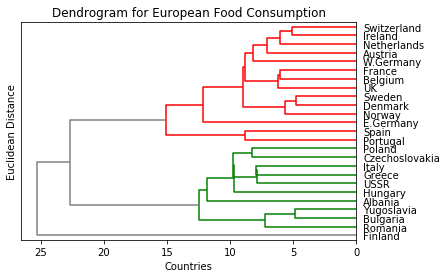

In [37]:
# X = protein_df
Z = sch.linkage(X, method = 'median')
dendrogram(Z, labels=denlabs, leaf_rotation=0, orientation="left", color_threshold=17, above_threshold_color='grey')
plt.title('Dendrogram for European Food Consumption')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance');
plt.show()

## Execise 2

Change the value of the color_threshold to generate only five clusters.

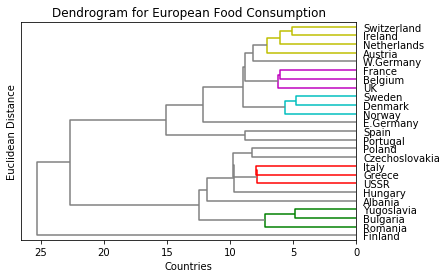

In [38]:
# X = protein_df
Z = sch.linkage(X, method = 'median')
dendrogram(Z, labels=denlabs, leaf_rotation=0, orientation="left", color_threshold=8, above_threshold_color='grey')
plt.title('Dendrogram for European Food Consumption')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance');
plt.show()

## **Lesson Turn In**

When you have completed all of the exercises and run **every** cell in this Lesson, orint out a PDF copy and upload it to BlackBoard. Your PDF should be called "Lesson12_Lastname.pdf" where _Lastname_ is your last name.,

## **References Cited**

(1)  R. A. Fisher (1936). "The use of multiple measurements in taxonomic problems". Annals of Eugenics. 7 (2): 179–188.